In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller

# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.tools.eval_measures as em
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from dateutil.parser import parse

In [7]:
df = pd.read_csv("dataset_group.csv", parse_dates = ['Date'], index_col = 'Date')

In [8]:
df.head()

,Order_id,Product
Date,,
2018-01-01,1,yogurt
2018-01-01,1,pork
2018-01-01,1,sandwich bags
2018-01-01,1,lunch meat
2018-01-01,1,all- purpose


In [9]:
df.tail()

,Order_id,Product
Date,,
2020-02-25,1138,soda
2020-02-25,1138,paper towels
2020-02-26,1139,soda
2020-02-26,1139,laundry detergent
2020-02-26,1139,shampoo


In [10]:
df.dtypes

Order_id     int64
Product     object
dtype: object

In [11]:
df.isnull().sum()

Order_id    0
Product     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20641 entries, 2018-01-01 to 2020-02-26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_id  20641 non-null  int64 
 1   Product   20641 non-null  object
dtypes: int64(1), object(1)
memory usage: 483.8+ KB


In [13]:
round(df.describe(),3)

,Order_id
count,20641.000
mean,575.986
std,328.557
min,1.000
25%,292.000
50%,581.000
75%,862.000
max,1139.000


In [14]:
df.shape

(20641, 2)

In [16]:
df['Product'].unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

# Exploratory Data Analysis

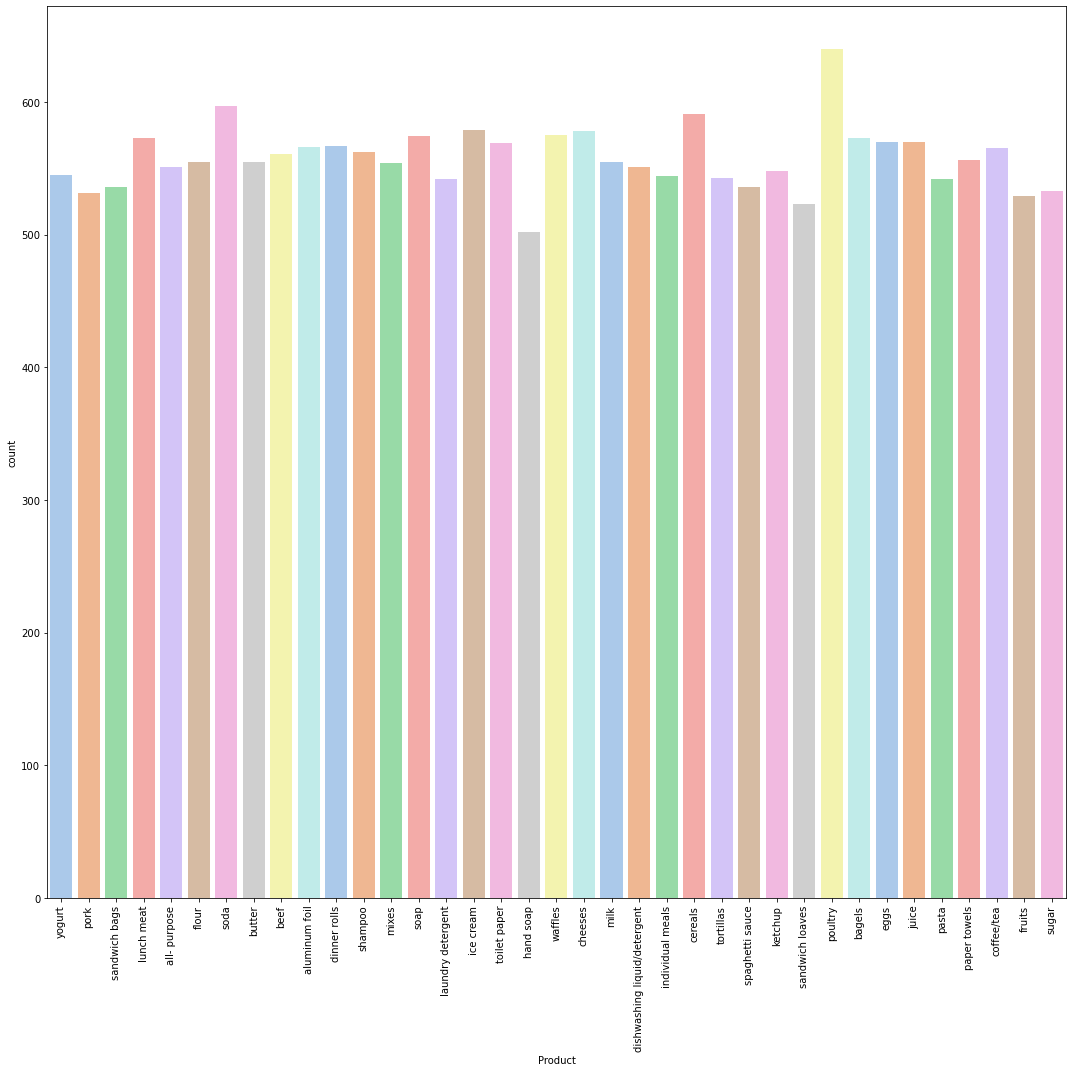

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x='Product', data=df, palette='pastel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()